In [4]:
import pandas as pd

In [5]:
df=pd.DataFrame()
for i in range(1,81):
    d=pd.read_csv(f'./data/trfcard ({i}).csv')
    df=pd.concat([df,d],ignore_index=True)

len(df)

842608

In [6]:
col = pd.read_csv('./data/meta.csv', encoding='euc-kr')
col = col[['컬럼명(영문)','컬럼명(한글)']]
col

col_list = col.to_dict('records')
col_list

new_dict = {}

for kv in col_list:
    new_dict[kv['컬럼명(영문)']] = kv['컬럼명(한글)']
new_dict

df = df.rename(columns= new_dict)
df.head(5)

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200229051543,20200229051942,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
1,20200229052108,20200229054920,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕사거리,129.403623,35.962553,죽도시장,129.365169,36.035704
2,20200229052215,20200229054440,101,양덕-고속터미널-동해,일반,N,N,풍림아이원,129.401705,36.085096,죽도시장,129.365486,36.034110
3,20200229052248,20200229055318,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200229052309,20200229052907,131,양덕-송도-시청-양학-양덕,일반,N,N,영보빌라,129.374157,36.039168,대해성당,129.368360,36.017960


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842608 entries, 0 to 842607
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   승차시각         842608 non-null  int64  
 1   하차시각         842608 non-null  int64  
 2   노선명          842608 non-null  object 
 3   노선설명         842608 non-null  object 
 4   승객연령         842608 non-null  object 
 5   환승여부         842608 non-null  object 
 6   추가운임여부       842608 non-null  object 
 7   승차정류장        842608 non-null  object 
 8   승차정류장 GPS X  842608 non-null  float64
 9   승차정류장 GPS Y  842608 non-null  float64
 10  하차정류장        842608 non-null  object 
 11  하차정류장 GPS X  842608 non-null  float64
 12  하차정류장 GPS Y  842608 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 83.6+ MB


In [8]:
df.describe()

,승차시각,하차시각,승차정류장 GPS X,승차정류장 GPS Y,하차정류장 GPS X,하차정류장 GPS Y
count,8.426080e+05,8.426080e+05,842608.000000,842608.000000,842608.000000,842608.000000
mean,2.020017e+13,2.020017e+13,129.369875,36.033987,129.369699,36.030874
std,6.691819e+07,6.691830e+07,0.051007,0.044272,0.042348,0.034512
min,2.020010e+13,2.020010e+13,129.025585,35.804119,129.025585,35.804119
25%,2.020012e+13,2.020012e+13,129.350290,36.010240,129.353856,36.013250
50%,2.020013e+13,2.020013e+13,129.365486,36.031170,129.365281,36.033732
75%,2.020022e+13,2.020022e+13,129.384770,36.064088,129.371682,36.045735
max,2.020033e+13,2.020040e+13,129.579045,36.303479,129.579045,36.303479


In [9]:
df.duplicated().sum()

0

In [10]:
# <버스 내 체류시간 분석>
# 기준일 및 시간대별 버스내 체류시간(분) 분석비교
# 시간 및 승객구분별 빈도분석 비교

In [11]:
df['기준일']=df['승차시각'].astype(str).str[0:8]


In [12]:
df['기준일'].sort_values()

540346    20200101
544081    20200101
544082    20200101
544083    20200101
544084    20200101
            ...   
36695     20200331
36696     20200331
36697     20200331
36690     20200331
36448     20200331
Name: 기준일, Length: 842608, dtype: object

In [13]:
df['기준일'].value_counts()

20200120    17984
20200110    17524
20200123    17415
20200121    17324
20200122    17247
            ...  
20200308     2827
20200331     2496
20200301     2402
20200329     1242
20200325      131
Name: 기준일, Length: 80, dtype: int64

In [14]:
df['하차시각d']=pd.to_datetime(df['하차시각'],format="%Y%m%d%H%M%S")
df['승차시각d']=pd.to_datetime(df['승차시각'],format="%Y%m%d%H%M%S")

In [15]:
df['체류시간']=df['하차시각d']-df['승차시각d']
df['체류시간']

0        0 days 00:03:59
1        0 days 00:28:12
2        0 days 00:22:25
3        0 days 00:30:30
4        0 days 00:05:58
               ...      
842603   0 days 00:03:16
842604   0 days 00:09:29
842605   0 days 00:13:46
842606   0 days 00:19:14
842607   0 days 00:04:17
Name: 체류시간, Length: 842608, dtype: timedelta64[ns]

In [16]:
df['시간대']=df['승차시각d'].dt.hour
df.head(1)

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,기준일,하차시각d,승차시각d,체류시간,시간대
0,20200229051543,20200229051942,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675,20200229,2020-02-29 05:19:42,2020-02-29 05:15:43,0 days 00:03:59,5


In [17]:
df['기준일']=pd.to_datetime(df['기준일'],format="%Y%m%d")
#df.info()

In [18]:
pivot2=df.pivot_table(values="체류시간",index='기준일',aggfunc=sum)
pivot2

,체류시간
기준일,
2020-01-01,118 days 07:55:57
2020-01-02,189 days 06:16:49
2020-01-03,198 days 14:18:13
2020-01-04,151 days 13:43:40
2020-01-05,109 days 15:17:57
...,...
2020-03-27,54 days 16:31:52
2020-03-28,42 days 20:45:29
2020-03-29,13 days 08:50:03


In [24]:
pivot=df.pivot_table(values="체류시간",index="시간대",aggfunc=sum)
pivot

,체류시간
시간대,
0,0 days 00:12:56
5,67 days 21:07:52
6,209 days 22:11:42
7,480 days 00:20:25
8,665 days 22:43:17
9,687 days 22:17:56
10,698 days 07:28:13
11,735 days 11:45:40
12,750 days 10:16:02


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from matplotlib import font_manager, rc
font_path="C:/Windows/Fonts/NanumGothicCoding-Bold.ttf"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

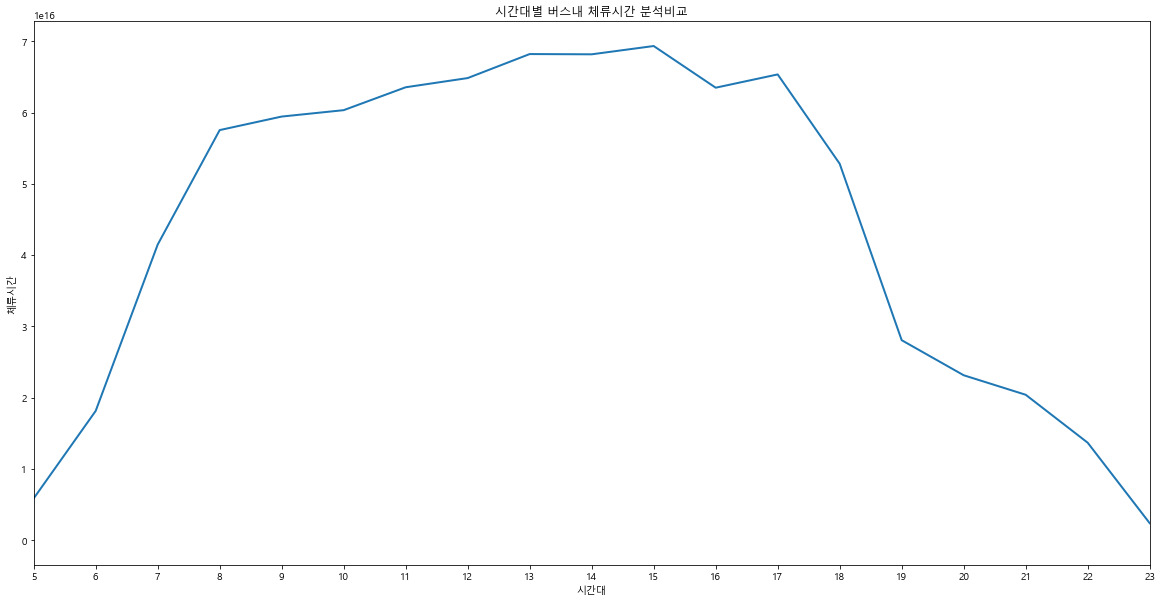

In [25]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["lines.linewidth"] = 2
plt.rc("font", family = "Malgun Gothic", size=10)

pivot.plot(legend=False)

plt.title("시간대별 버스내 체류시간 분석비교")
plt.xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.xlim(5,23)
plt.ylabel('체류시간')

plt.show()

In [ ]:
## 분석
# 1. 새벽시간대인 5-6시와 저녁시간대인 22-23시에 체류시간이 가장 짧다.
# 2. 새벽시간 이후 체류시간은 급증하며 본격적인 출근시간인 8시부터 15시까지 완만한 상승세를 보인다.
# 3. 이후 17시부터 이동량의 급감세가 19시까지 지속되는데 대도시에 비해 비교적 규모가 작은 소도시이므로
#  이동량의 감소가 다소 이른 시각에 시작되는 것으로 보인다.

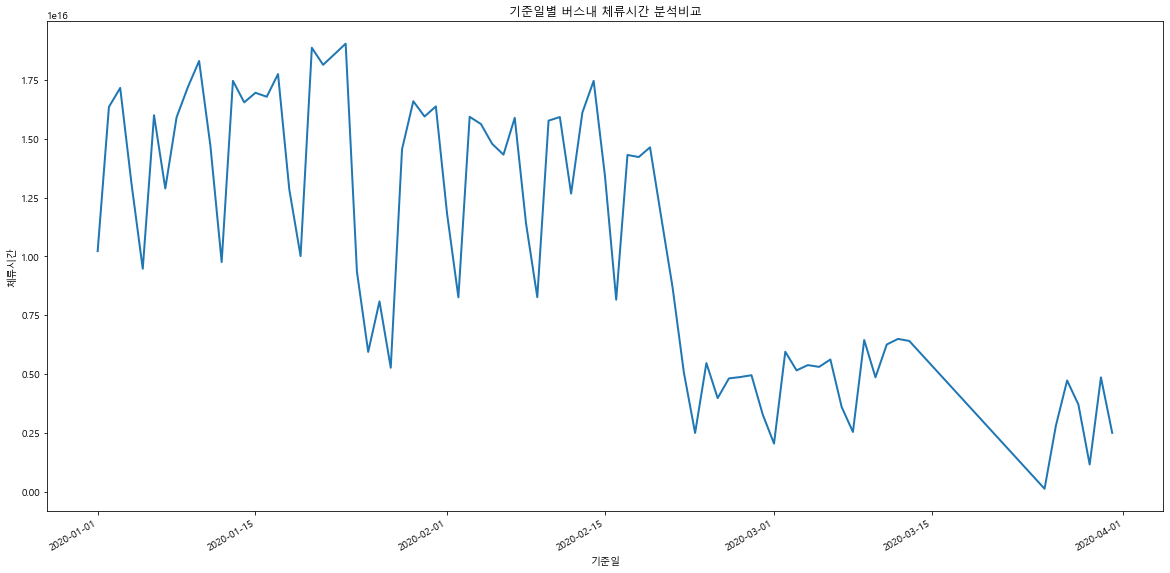

In [23]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["lines.linewidth"] = 2
plt.rc("font", family = "Malgun Gothic", size=10)

pivot2.plot(legend=False)

plt.title("기준일별 버스내 체류시간 분석비교")
#plt.xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel('체류시간')

plt.show()

In [ ]:
## 분석
# 1. 1월부터 2월 말까지 주중에는 체류시간이 길고, 주말에는 짧은 패턴이 대체로 지속된다.
# 2. 다만 1월 말 경 일시적으로 체류시간이 급감하는 시기는 한파 때문일 것으로 보인다.
# 3. 1,2월은 방학 시기로 인근 도시 혹은 다른 곳에서의 관광객 유입이 지속적으로 유지되는 것으로 보이며,
#  이후 2월 말부터 체류시간이 급감하여 (3월 일부 데이터 없음) 이 패턴이 유지된다.